# **Linear-Nonlinear (LN) Model**

We have already looked into how to handle and analyze spike trains recorded under visual stimulation and also calculate the spike-triggered average. We will now turn to a very common modelling tool used in sensory system neuroscience, the linear-nonlinear model.

**It consists of:**
 - Spike-triggered average (STA)
 - Nonlinearity function

These two components summarise the computation done by a neuron when presented a stimuli. Our ultimate goal is to predict the responses of a neuron to a given stimuli and thus we can use our understanding of the computation done by the neuron for this. 

Here, you will learn to:

- Filter the stimuli using the spike-trigerred average (STA)
- Build the nonlinearity function
- Predict responses of the neuron to a given stimuli

Let's start by importing relevant packages.

In [1]:
%matplotlib inline
%config InlineBackend.rc={'figure.figsize': (12, 6), 'font.size': 14 }
from matplotlib import pyplot as plt
import numpy as np
from numpy import load
from pathlib import Path
import math

# **1. Loading the data**

Let us load the pulses and the stimulus values again along with spike times from an example cell.

In [2]:
## Loading pulses 
filepath='data_LN_model/frametimes_fullfieldnoise.txt'
pulses=np.loadtxt(filepath)

In [3]:
## Loading stimulus values
filepath='data_LN_model/stimulus_fullfieldnoise.txt'
stimulus=np.loadtxt(filepath)

In [4]:
## Loading spike times for one example cell
filepath='data_LN_model/fullfieldnoise_C1.txt'
spike_times=np.loadtxt(filepath)

As we learnt previously, we have to organise `pulses`,`stimulus` and `spike_times` into **training set** and **test set**. 
To save time, let us copy our functions and calculations from the previous notebbok and paste it here.

**Exercise:** Copy the relevant functions and code from the previous notebook (day3_1_STA) to organise `pulses`,`stimulus` and `spike_times` into training set and test set.

In [5]:
# 1. Reshaping pulses and stimulus into trials

## START CODE HERE ##

nframes_training=1800
nframes_test=600

# Making sure stimulus and pulses have same length
stimulus=stimulus[:len(pulses)]

# Calculating number of trials and reshaping pulses according to it.
trialframes=nframes_training+nframes_test
num_trials=math.floor(len(pulses)/trialframes)

pulses=pulses[:num_trials*trialframes]
pulses=np.reshape(pulses,(num_trials,trialframes))

stimulus=stimulus[:num_trials*trialframes]
stimulus=np.reshape(stimulus,(num_trials,trialframes))

## END CODE HERE ##

In [6]:
# 2. Arranging pulses and stimulus into training and test set

## START CODE HERE ##

pulses_training=pulses[:,:nframes_training]
pulses_test=pulses[:,nframes_training:]

stimulus_training=stimulus[:,:nframes_training,]
stimulus_test=stimulus[:,nframes_training:]

## END CODE GERE ##

In [7]:
# 3. Arranging spike times into training and test set

## START YOUR CODE HERE ##

def get_spikes_training(spikes, training_pulses):
    
    numtrials=np.shape(training_pulses)[0]
    spikes_training=[]
    for k in range(numtrials):
        tr=spikes[
            (spikes > training_pulses[k, 0]) & 
            (spikes < training_pulses[k, -1])
        ]
        spikes_training.append(tr)

    return spikes_training


def get_spikes_test(spikes,test_pulses):

    numtrials=np.shape(test_pulses)[0]
    spikes_test=[]
    for k in range(numtrials):
        tr=spikes[
            (spikes > test_pulses[k, 0]) & 
            (spikes < test_pulses[k, -1])
        ]
        spikes_test.append(tr)

    return spikes_test

## END YOUR CODE HERE ##

spikes_training=get_spikes_training(spike_times, pulses_training)
spikes_test=get_spikes_test(spike_times, pulses_test)

# **2. Filtering of stimulus using spike-triggered average**

In order to save you some time (and assuming you successfully managed to calculate the STA in the previous task 😊), we have provided STAs for all cells as text files in the data folder.

Let us now load the STA of the example cell.

In [9]:
## Loading STA of the example cell
filepath='data_LN_model/STA_C1.txt'
STA=np.loadtxt(filepath)

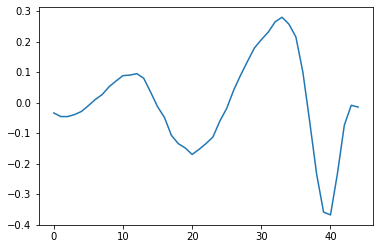

In [10]:
plt.plot(STA)